<a href="https://colab.research.google.com/github/rahmadkholid/Optimizing-Heart-Disease-Diagnosis-Using-Gradient-Boosting-Classifier/blob/main/Optimizing_Heart_Disease_Diagnosis_Using_Gradient_Boosting_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Dataset yang Digunakan**

Dataset yang digunakan bersumber dari [<i>Kaggle Heart Disease Dataset</i>](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). Dataset ini sering digunakan dalam analisis data kesehatan untuk memprediksi risiko penyakit jantung.

In [ ]:
# Import library yang dibutuhkan
import pandas as pd

# Proses ekstraksi data
data_heart = pd.read_csv('heart.csv')

# Tampilkan hasilnya
data_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **2. Informasi Umum pada Data**

In [ ]:
# Akses informasi umum pada data
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Dari informasi di atas, dapat diketahui bahwa dataset yang digunakan terdiri dari 1025 baris dan 14 kolom dengan penjelasan masing - masing kolom sebagai berikut :
* `age` : Menunjukkan usia pasien dalam tahun.

* `sex` : Merupakan jenis kelamin pasien, di mana
  * 1 = Pria;
  * 0 = Wanita.

* `cp` : Menggambarkan jenis nyeri dada yang dialami pasien, diukur dalam skala kategori (4 nilai), di mana
  * 0 = Tidak ada gejala nyeri dada (asymptomatic);
  * 1 = Nyeri dada bukan disebabkan oleh penyempitan pembuluh darah jantung (non-anginal pain);
  * 2 = Nyeri dada tidak khas atau tidak mengikuti pola angina biasa (atypical angina);
  * 3 = Nyeri dada karena penyempitan pembuluh darah jantung (typical angina).

* `trestbps` : Merupakan tekanan darah istirahat pasien (dalam mmHg saat masuk ke rumah sakit).

* `chol` : Menunjukkan kadar serum kolesterol pasien (dalam mg/dl).

* `fbs` : Variabel biner yang menunjukkan apakah kadar gula darah puasa pasien > 120 mg/dl, di mana
  * 1 = Ya;
  * 0 = Tidak.

* `restecg` : Menggambarkan hasil elektrokardiografi istirahat pasien dalam beberapa kategori, di mana
  * 0 = Normal;
  * 1 = Abnormality;
  * 2 = Probable (kemungkinan ada hipertrofi ventrikel kiri).

* `thalach` : Menunjukkan detak jantung maksimum yang dicapai pasien selama tes latihan.

* `exang` : Variabel biner yang menunjukkan apakah pasien mengalami angina yang diinduksi olahraga, di mana
  * 1 = Ya;
  * 0 = Tidak.

* `oldpeak` : Menggambarkan depresi segmen ST yang dipicu oleh olahraga relatif terhadap istirahat.

* `slope` : Menunjukkan kemiringan segmen ST dalam tes latihan, di mana
  * 0 = Naik;
  * 1 = Datar;
  * 2 = Turun.

* `ca` : Jumlah pembuluh darah utama (0-3) yang diwarnai oleh fluoroskopi.

* `thal` : Menggambarkan jenis thalassemia yang dimiliki pasien dalam beberapa kategori, di mana
  * 1 = Normal;
  * 2 = Cacat Tetap;
  * 3 = Cacat yang Dapat Pulih.

  (*terdapat perbedaan label pada deskripsi dataset dan deskripsi kolom di Kaggle, di sini dipilih yang menyebabkan data tidak validnya lebih sedikit*)

* `target` : Variabel target yang menunjukkan apakah pasien memiliki penyakit jantung, di mana
  * 1 = Ya;
  * 0 = Tidak.  

<p align="right">
Referensi : <a href = "https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset"><i>Kaggle Heart Disease Dataset</i></a> & <br>
<a href = "https://libres.uncg.edu/ir/ecsu/f/Brandon_Simmons_Thesis-Final.pdf"><i>Investigating Heart Disease Datasets and Building Predictive
Models</i></a>
</p>

> Terdapat kesalahan label kelas target pada dataset, yaitu label yang diberikan terbalik di mana `target`=0 seharusnya bernilai 1 dan `target`=1 seharusnya bernilai 0. Agar sesuai dengan deskripsi yang sudah ada seperti deskripsi di atas, maka perlu dilakukan penggantian nilai `target`=0 --> `target`=1 dan `target`=1 --> `target`=0. Selain itu, juga terdapat label yang tidak sesuai dengan deskripsi pada kolom `cp`, `restecg`, `slope`, dan `thal` sehingga perlu dilakukan penggantian ke nilai yang seharusnya.

(Referensi: [<i>Kaggle Heart Disease Dataset - Discussion</i>](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/discussion/401933) & [Temuan saat Data Preprocessing](https://colab.research.google.com/drive/1L0WTgWBvOj072v5PHh8Zkc47H4nSUNDg))

In [ ]:
# Buat dataframe baru dengan perbaikan label kelas target yang terbalik dan label yang tidak sesuai deskripsi
df = pd.DataFrame()
df = data_heart.copy()
df['target'] = data_heart['target'].map({
    0 : 1,
    1 : 0
})
df['cp'] = data_heart['cp'].map({
    1 : 0,
    2 : 1,
    3 : 2,
    0 : 3
})
df['restecg'] = data_heart['restecg'].map({
    1 : 0,
    0 : 1,
    2 : 2,
})
df['slope'] = data_heart['slope'].map({
    2 : 0,
    0 : 1,
    1 : 2,
})
df['thal'] = data_heart['thal'].map({
    0 : 0,
    2 : 1,
    1 : 2,
    3 : 3,
})

# Tampilkan hasilnya
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,3,125,212,0,0,168,0,1.0,0,2,3,1
1,53,1,3,140,203,1,1,155,1,3.1,1,0,3,1
2,70,1,3,145,174,0,0,125,1,2.6,1,0,3,1
3,61,1,3,148,203,0,0,161,0,0.0,0,1,3,1
4,62,0,3,138,294,1,0,106,0,1.9,2,3,1,1


# **3. Identifikasi Problem Utama**

In [ ]:
# Perhitungan proporsi kelas target
proporsi_target = df.groupby('target', as_index = False).agg(total = ('target', 'count'))
proporsi_target['target'] = proporsi_target['target'].replace({0: 'No Heart Disease', 1: 'Heart Disease'})

# Tampilkan hasil
display(proporsi_target)

,target,total
0,No Heart Disease,526
1,Heart Disease,499


In [ ]:
# Import library untuk visualisasi
import plotly.express as px

# Hitung total data
total_data = proporsi_target['total'].sum()

# Warna
biru = '#2178B5'
orange = '#FF7F0E'

# Buat pie chart
fig = px.pie(
    values = proporsi_target['total'],
    names = proporsi_target['target'],
    color_discrete_sequence = [biru, orange],
    hole = 0.65
)

# Atur posisi label
fig.update_traces(
    textposition = 'outside',
    textinfo = 'percent+label',
    hovertemplate='<b>%{label}</b><br>%{value} Pasien'
)

# Atur luas grafik, hapus legend dan beri judul
fig.update_layout(
    width = 800,
    height = 600,
    showlegend = False,
    margin = dict(l=160, r=200, t=100, b=30),
    title = dict(
        text = f"<b>Proporsi Status Penyakit Jantung Pasien</b><br><sup>Lebih dari setengah pasien <span style='color:{biru}'><b>tidak memiliki penyakit jantung</b></span></sup>",
        font = dict(size = 22),
        y = 0.92,
        x = 0.50
    )
)

# Berikan informasi total pasien di tengah donut chart
fig.add_annotation(
    text = f'Total Pasien<br><b><span style="font-size: 28px;">{total_data}</b></span>',
    x = 0.5,
    y = 0.5,
    showarrow = False,
    font = dict(size = 20)
)

# Tampilkan grafik
fig.show()

# **4. Exploratory Data Analysis (EDA)**

## **4.1 Statistik Deskriptif**

In [ ]:
# Seleksi fitur numerik dan kategorik secara eksplisit
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # Kolom 'ca' dianggap sebagai data kategorik karena bersifat DISKRIT dan TERBATAS (0, 1, 2, atau 3)
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_num = df[num_features]
df_cat = df[cat_features]

# Perhitungan statistik deskriptif
# Fitur numerik
statistics_num = pd.DataFrame({
    'mean' : df_num.mean().round(2),
    'median': df_num.median(),
    'modus': df_num.mode().iloc[0],
    'min': df_num.min(),
    'max': df_num.max(),
    'q1' : df_num.quantile(0.25),
    'q2' : df_num.quantile(0.50),
    'q3' : df_num.quantile(0.75),
    'stdev' : df_num.std().round(2)
})
print('Statistik Deskriptif pada Fitur Numerik :')
display(statistics_num)

# Fitur kategorik
statistics_cat = pd.DataFrame({
    'count' : df_cat.count(),
    'unique': (df_cat[col].unique() for col in cat_features),
    'top': df_cat.mode().iloc[0],
    'top_freq': (df_cat[col].value_counts().max() for col in cat_features)
})
print('\n\nStatistik Deskriptif pada Fitur Kategorik :')
display(statistics_cat)

Statistik Deskriptif pada Fitur Numerik :


,mean,median,modus,min,max,q1,q2,q3,stdev
age,54.43,56.0,58.0,29.0,77.0,48.0,56.0,61.0,9.07
trestbps,131.61,130.0,120.0,94.0,200.0,120.0,130.0,140.0,17.52
chol,246.00,240.0,204.0,126.0,564.0,211.0,240.0,275.0,51.59
thalach,149.11,152.0,162.0,71.0,202.0,132.0,152.0,166.0,23.01
oldpeak,1.07,0.8,0.0,0.0,6.2,0.0,0.8,1.8,1.18




Statistik Deskriptif pada Fitur Kategorik :


,count,unique,top,top_freq
sex,1025,"[1, 0]",1,713
cp,1025,"[3, 0, 1, 2]",3,497
fbs,1025,"[0, 1]",0,872
restecg,1025,"[0, 1, 2]",0,513
exang,1025,"[0, 1]",0,680
slope,1025,"[0, 1, 2]",2,482
ca,1025,"[2, 0, 1, 3, 4]",0,578
thal,1025,"[3, 1, 2, 0]",1,544


Sesuai dengan deskripsi yang telah dijelaskan pada bagian 2 (Informasi Umum pada Data), setelah diperiksa terdapat nilai yang tidak valid yakni :     
* Nilai pada kolom `ca` seharusnya terbatas hanya 0, 1, 2, atau 3, namun setelah diobservasi terdapat nilai di luar itu (yaitu **4**) sehingga perlu dilakukan penanganan.
* Nilai pada kolom `thal` seharusnya hanya 1, 2, atau 3, namun setelah diobservasi terdapat nilai di luar itu (yaitu **0**) sehingga perlu dilakukan penanganan.

## **4.2 Data Validation**

In [ ]:
# Deteksi jumlah dan proporsi baris yang mengandung data tidak valid
invalid_rows = len(df[(df['ca']==4) | (df['thal']==0)])
print(f"Jumlah baris yang mengandung data tidak valid adalah {invalid_rows} baris\
 atau {round(invalid_rows/len(df)*100, 2)}% dari keseluruhan data")

Jumlah baris yang mengandung data tidak valid adalah 25 baris atau 2.44% dari keseluruhan data


Karena jumlah baris dengan data tidak valid bisa dibilang sedikit (hanya sekitar 2% dari keseluruhan data), maka dapat dilakukan penanganan berupa penghapusan baris yang mengandung data tidak valid.

In [ ]:
# Hapus baris yang mengandung data tidak valid
df = df[(df['ca']!=4) & (df['thal']!=0)]

# Periksa kembali jumlah baris yang mengandung data tidak valid
print(f"Jumlah baris yang mengandung data tidak valid setelah dilakukan validasi data adalah {len(df[(df['ca']==4) | (df['thal']==0)])} baris")

Jumlah baris yang mengandung data tidak valid setelah dilakukan validasi data adalah 0 baris


## **4.3 Periksa Missing Value**

In [ ]:
# Hitung jumlah missing value per kolom
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## **4.4 Periksa Data Duplikat**

In [ ]:
# Menghitung kejadian baris duplikat (kecuali kejadian pertama) pada semua kolom
print(f"Jumlah baris yang duplikat (kecuali kejadian pertama) pada semua kolom = {df.duplicated().sum()}")

# Menghitung persentase duplikasi
dup_percentage = df.duplicated().sum() / len(df) * 100
print(f"Persentase duplikasi = {dup_percentage:.2f}%")

Jumlah baris yang duplikat (kecuali kejadian pertama) pada semua kolom = 704
Persentase duplikasi = 70.40%


Proporsi yang tinggi dari duplikasi tersebut (mencapai 70% dari keseluruhan dataset) menunjukkan adanya masalah dalam pengumpulan, pemrosesan, atau penyimpanan dataset. Hal ini mengindikasikan duplikasi tersebut disebabkan oleh kesalahan teknis atau penyebab lainnya yang bukan merupakan hasil alami dari data yang diamati.

Duplikasi baris yang demikian dapat mengganggu analisis data dengan memberikan bobot yang tidak seimbang pada data yang sama, yang dapat menyebabkan bias atau hasil yang tidak akurat. Dengan menghapus baris yang duplikat pada semua kolom (yang benar-benar identik), informasi yang terkandung dalam data tidak akan berkurang, justru dapat meningkatkan keandalan hasil analisis.

In [ ]:
# Hapus baris yang duplikat (kecuali kejadian pertama) pada semua kolom
df.drop_duplicates(inplace = True)

<ipython-input-11-4018683845c9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## **4.5 Periksa Distribusi & Outlier pada Fitur Numerik**

In [ ]:
# Import library visualisasi data
import plotly.express as px

# Definisikan warna
colors = ["#800000", "#006994", "#228B22", "#F6C90E", "#BA55D3"]

for col, color in zip(num_features, colors): # Hanya pada fitur numerik
  # Buat histogram dengan horizontal box plot
  fig = px.histogram(
      df[col],
      color_discrete_sequence  = [color],
      marginal = 'box'
  )

  fig.update_traces(
      marker_line_width = 1,
      marker_line_color = 'white'
  )

  # Update layout
  fig.update_layout(
      width = 950,
      height = 400,
      showlegend = False,
      plot_bgcolor = 'rgba(0, 0, 0, 0)',
      title = f"<b>Histogram dengan Box Plot <span style='color:{color}'>{col}</span></b>",
      yaxis = dict(
          title = '',
          showgrid = False,
          showline = False,
          showticklabels = False,
          zeroline = False,
      ),
      xaxis = dict(
          title = col,
          showgrid = False,
          showline = True,
          showticklabels = True,
          zeroline = False,
      )
  )

  # Tampilkan grafik
  fig.show()

Berdasarkan grafik histogram yang disertai boxplot di atas, berikut penjelasan distribusi tiap kolom numerik :
* Distribusi usia pasien (`age`) cenderung menceng ke kiri (negative skewed) dilihat dari Q2 yang lebih dekat dengan Q3. Tidak ada outlier pada kolom ini.
* Distribusi tekanan darah istirahat pasien (`trestbps`) cenderung normal dilihat dari jarak Q2 ke Q1 yang sama dengan jarak Q2 ke Q3, tetapi terdapat outlier.
* Distribusi kadar serum kolesterol pasien (`chol`) cenderung normal dilihat dari jarak Q2 ke Q1 yang hampir sama dengan jarak Q2 ke Q3, tetapi terdapat outlier.
* Distribusi detak jantung maksimum yang dicapai pasien selama tes latihan (`thalach`) cenderung menceng ke kiri (negative skewed) dilihat dari Q2 yang lebih dekat dengan Q3. Terdapat outlier pada kolom ini.
* Distribusi tingkat depresi segmen ST yang dipicu oleh olahraga relatif terhadap istirahat (`oldpeak`) cenderung menceng ke kanan (positive skewed) dilihat dari Q2 yang lebih dekat dengan Q1. Terdapat outlier pada kolom ini.

In [ ]:
# Menghitung banyak outlier pada tiap kolom numerik menggunakan IQR
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
label_outlier = (df[num_features] < lower_fence) | (df[num_features] > upper_fence)
print("Banyak data outlier per kolom :")
print(label_outlier.sum())

Banyak data outlier per kolom :
age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64


Untuk penanganan outlier, pendekatan yang digunakan adalah dengan memilih model yang memiliki sifat tahan atau robust terhadap outlier.

## **4.6 Statistik Deskriptif Fitur Numerik Berdasarkan Kelas Target**

In [ ]:
# Bagi data berdasarkan kelas target
heart_disease = df[df['target'] == 1]
no_heart_disease = df[df['target'] == 0]

# Ambil hanya data numerik per masing - masing kelas target
heart_disease_num = heart_disease[num_features]
no_heart_disease_num = no_heart_disease[num_features]

# Perhitungan statistik deskriptif per masing - masing kelas target
statistics_breakdown_target = pd.DataFrame({
    ('Mean', 'Heart Disease') : heart_disease_num.mean().round(2),
    ('Mean', 'No Heart Disease') : no_heart_disease_num.mean().round(2),
    ('Median', 'Heart Disease') : heart_disease_num.median().round(2),
    ('Median', 'No Heart Disease') : no_heart_disease_num.median().round(2),
    ('Modus', 'Heart Disease') : heart_disease_num.mode().iloc[0],
    ('Modus', 'No Heart Disease') : no_heart_disease_num.mode().iloc[0],
    ('Min', 'Heart Disease') : heart_disease_num.min(),
    ('Min', 'No Heart Disease') : no_heart_disease_num.min(),
    ('Max', 'Heart Disease') : heart_disease_num.max(),
    ('Max', 'No Heart Disease') : no_heart_disease_num.max(),
    ('Q1', 'Heart Disease') : heart_disease_num.quantile(0.25),
    ('Q1', 'No Heart Disease') : no_heart_disease_num.quantile(0.25),
    ('Q2', 'Heart Disease') : heart_disease_num.quantile(0.50),
    ('Q2', 'No Heart Disease') : no_heart_disease_num.quantile(0.50),
    ('Q3', 'Heart Disease') : heart_disease_num.quantile(0.75),
    ('Q3', 'No Heart Disease') : no_heart_disease_num.quantile(0.75),
    ('St. Dev', 'Heart Disease') : heart_disease_num.std().round(2),
    ('St. Dev', 'No Heart Disease') : no_heart_disease_num.std().round(2)
})

# Tampilkan hasilnya
display(statistics_breakdown_target)

Mean                         Median                   \
         Heart Disease No Heart Disease Heart Disease No Heart Disease   
age              56.74            52.64          58.0             52.0   
trestbps        134.46           129.18         130.0            130.0   
chol            251.46           243.49         251.0            235.5   
thalach         138.95           158.58         141.5            161.0   
oldpeak           1.60             0.60           1.4              0.2   

                 Modus                            Min                   \
         Heart Disease No Heart Disease Heart Disease No Heart Disease   
age               58.0             54.0          35.0             29.0   
trestbps         140.0            120.0         100.0             94.0   
chol             212.0            197.0         131.0            126.0   
thalach          132.0            162.0          71.0             96.0   
oldpeak            0.0              0.0           0.0              0.0   

                   Max                             Q1                   \
         Heart Disease No Heart Disease Heart Disease No Heart Disease   
age               77.0             76.0         52.75            44.75   
trestbps         200.0            180.0        120.00           120.00   
chol             409.0            564.0        217.75           208.75   
thalach          195.0            202.0        125.00           149.00   
oldpeak            6.2              4.2          0.60             0.00   

                    Q2                             Q3                   \
         Heart Disease No Heart Disease Heart Disease No Heart Disease   
age               58.0             52.0        62.000            59.00   
trestbps         130.0            130.0       145.000           140.00   
chol             251.0            235.5       283.250           268.25   
thalach          141.5            161.0       156.250           172.00   
oldpeak            1.4              0.2         2.525             1.10   

               St. Dev                   
         Heart Disease No Heart Disease  
age               7.92             9.55  
trestbps         18.86            16.37  
chol             49.65            53.76  
thalach          22.72            19.04  
oldpeak           1.30             0.79

## **4.7 Periksa Distribusi Fitur Numerik Berdasarkan Kelas Target**

In [ ]:
# Import library yang dibutuhkan
import plotly.figure_factory as ff

# Lakukan hanya pada fitur numerik
for col in num_features:
  # Kelompokkan data
  hist_data = [no_heart_disease[col], heart_disease[col]]
  group_labels = ['No Heart Disease', 'Heart Disease']

  # Buat distplot
  fig = ff.create_distplot(
      hist_data,
      group_labels,
      show_hist = False,
      show_rug = False
  )

  # Atur layout
  fig.update_layout(
      width = 900,
      height = 400,
      plot_bgcolor = 'rgba(0, 0, 0, 0)',
      title = dict(
          text = f"<b>Distribusi <span style='color:#B33030'>{col}</span> pada Kelompok Heart Disease VS No Heart Disease</b>",
          font = dict(
              size = 20,
              color = 'black'
          ),
          y = 0.92,
          x = 0.5
      )
  )

  fig.update_xaxes(showline = True, linewidth = 1, linecolor = 'black')
  fig.update_yaxes(showline = True, linewidth = 1, linecolor = 'black')

  # Tampilkan visualisasi
  fig.show()

### **4.7.1 Uji Parametrik**

Uji-t sampel independen (*independent samples t-test*) adalah metode statistika parametrik yang digunakan untuk membandingkan rata-rata dari dua kelompok (kategorik) independen atau tidak berpasangan. Uji ini sering digunakan untuk menguji apakah ada perbedaan signifikan antara dua kelompok tersebut dalam hal rata-rata variabel (kontinu) yang diukur.

**Hipotesis uji-t sampel independen** untuk kasus ini :     
* **Hipotesis Nol (H0)**: Tidak ada perbedaan signifikan antara rata-rata variabel kontinu pada kelompok Heart Disease dan No Heart Disease. Dengan kata lain, variabel tersebut tidak berpengaruh secara signifikan terhadap risiko terkena penyakit jantung.

* **Hipotesis Alternatif (H1)**: Terdapat perbedaan signifikan antara rata-rata variabel kontinu pada kelompok Heart Disease dan No Heart Disease. Dengan kata lain, variabel tersebut berpengaruh secara signifikan terhadap risiko terkena penyakit jantung.

Pada kasus ini, variabel kontinu yang dimaksud adalah :
* Usia (`age`)
* Tekanan darah istirahat (`trestbps`)
* Kadar serum kolesterol (`chol`)
* Detak jantung maksimum selama tes latihan (`thalach`)
* Depresi segmen ST yang dipicu oleh olahraga relatif terhadap istirahat (`oldpeak`)

Sebelum melakukan uji-t sampel independen, perlu dilakukan uji kesamaan varians populasi melalui uji-F kesamaan variansi (*F-test of equality of variances*). Uji ini penting karena uji t sampel independen mengasumsikan bahwa kedua kelompok yang dibandingkan memiliki varians populasi yang sama atau setara. Jika varians populasi kedua kelompok berbeda secara signifikan, maka uji yang dilakukan adalah *Welch’s t-test* ([Referensi](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#r3566833beaa2-2)).

**Hipotesis uji-F kesamaan variansi** untuk kasus ini :     
* **Hipotesis Nol (H0)**: Varians populasi dari variabel kontinu pada kelompok Heart Disease dan No Heart Disease adalah sama.

* **Hipotesis Alternatif (H1)**: Varians populasi dari variabel kontinu pada kelompok Heart Disease dan No Heart Disease berbeda.

In [ ]:
# Import library yang dibutuhkan
import numpy as np
import scipy.stats as stats

for col in num_features:
  # Definisikan 2 kelompok sampel
  group1 = heart_disease[col]
  group2 = no_heart_disease[col]

  # Hitung varians sampel tiap kelompok
  variance1 = np.var(group1, ddof=1)
  variance2 = np.var(group2, ddof=1)

  # Hitung statistik uji F
  f_value = variance1 / variance2

  # Hitung derajat bebas
  df1 = len(group1) - 1
  df2 = len(group2) - 1

  # Hitung p-value
  p_value = stats.f.cdf(f_value, df1, df2)

  # Tetapkan taraf nyata
  alpha = 0.05

  # Tampilkan hasil
  print(f"\nHasil uji-F kesamaan varians pada variabel {col} (alpha = 0.05):")
  print(f"p-value   : {p_value:.5f}")
  if (p_value < alpha):
    print("Keputusan : Tolak H0")
    print(f"Kesimpulan: Varians populasi dari variabel {col} pada kelompok Heart Disease dan No Heart Disease berbeda")
  else:
    print("Keputusan : Terima H0")
    print(f"Kesimpulan: Varians populasi dari variabel {col} pada kelompok Heart Disease dan No Heart Disease adalah sama")


Hasil uji-F kesamaan varians pada variabel age (alpha = 0.05):
p-value   : 0.01284
Keputusan : Tolak H0
Kesimpulan: Varians populasi dari variabel age pada kelompok Heart Disease dan No Heart Disease berbeda

Hasil uji-F kesamaan varians pada variabel trestbps (alpha = 0.05):
p-value   : 0.95661
Keputusan : Terima H0
Kesimpulan: Varians populasi dari variabel trestbps pada kelompok Heart Disease dan No Heart Disease adalah sama

Hasil uji-F kesamaan varians pada variabel chol (alpha = 0.05):
p-value   : 0.17071
Keputusan : Terima H0
Kesimpulan: Varians populasi dari variabel chol pada kelompok Heart Disease dan No Heart Disease adalah sama

Hasil uji-F kesamaan varians pada variabel thalach (alpha = 0.05):
p-value   : 0.98369
Keputusan : Terima H0
Kesimpulan: Varians populasi dari variabel thalach pada kelompok Heart Disease dan No Heart Disease adalah sama

Hasil uji-F kesamaan varians pada variabel oldpeak (alpha = 0.05):
p-value   : 1.00000
Keputusan : Terima H0
Kesimpulan: Varians

In [ ]:
# Tetapkan taraf nyata
alpha = 0.05

# Lakukan uji-t sampel independen dengan variansi populasi berbeda (Welch's t-test)
t_beda = stats.ttest_ind(heart_disease['age'], no_heart_disease['age'], equal_var=False)

# Tampilkan hasil
print(f"\nHasil uji-t sampel independen dengan variansi populasi berbeda pada variabel age (alpha = 0.05):")
print(f"p-value   : {t_beda.pvalue:.5f}")
if (t_beda.pvalue < alpha):
  print("Keputusan : Tolak H0")
  print(f"Kesimpulan: Terdapat perbedaan signifikan antara rata-rata variabel age pada kelompok Heart Disease dan No Heart Disease")
else:
  print("Keputusan : Terima H0")
  print(f"Kesimpulan: Tidak ada perbedaan signifikan antara rata-rata variabel age pada kelompok Heart Disease dan No Heart Disease")

# Lakukan uji-t sampel independen dengan variansi sama
for col in ['trestbps', 'chol', 'thalach', 'oldpeak']:
  t_sama = stats.ttest_ind(heart_disease[col], no_heart_disease[col], equal_var=True)

  # Tampilkan hasil
  print(f"\nHasil uji-t sampel independen dengan variansi populasi sama pada variabel {col} (alpha = 0.05):")
  print(f"p-value   : {t_sama.pvalue:.5f}")
  if (t_sama.pvalue < alpha):
    print("Keputusan : Tolak H0")
    print(f"Kesimpulan: Terdapat perbedaan signifikan antara rata-rata variabel {col} pada kelompok Heart Disease dan No Heart Disease")
  else:
    print("Keputusan : Terima H0")
    print(f"Kesimpulan: Tidak ada perbedaan signifikan antara rata-rata variabel {col} pada kelompok Heart Disease dan No Heart Disease")



Hasil uji-t sampel independen dengan variansi populasi berbeda pada variabel age (alpha = 0.05):
p-value   : 0.00007
Keputusan : Tolak H0
Kesimpulan: Terdapat perbedaan signifikan antara rata-rata variabel age pada kelompok Heart Disease dan No Heart Disease

Hasil uji-t sampel independen dengan variansi populasi sama pada variabel trestbps (alpha = 0.05):
p-value   : 0.01030
Keputusan : Tolak H0
Kesimpulan: Terdapat perbedaan signifikan antara rata-rata variabel trestbps pada kelompok Heart Disease dan No Heart Disease

Hasil uji-t sampel independen dengan variansi populasi sama pada variabel chol (alpha = 0.05):
p-value   : 0.18911
Keputusan : Terima H0
Kesimpulan: Tidak ada perbedaan signifikan antara rata-rata variabel chol pada kelompok Heart Disease dan No Heart Disease

Hasil uji-t sampel independen dengan variansi populasi sama pada variabel thalach (alpha = 0.05):
p-value   : 0.00000
Keputusan : Tolak H0
Kesimpulan: Terdapat perbedaan signifikan antara rata-rata variabel thal

Dengan kata lain, hasil tersebut menunjukkan bahwa variabel usia (`age`), tekanan darah istirahat (`trestbps`), detak jantung maksimum selama tes latihan (`thalach`), depresi segmen ST yang dipicu oleh olahraga relatif terhadap istirahat (`oldpeak`), berpengaruh signifikan (secara parsial atau masing-masing) terhadap risiko terkena penyakit jantung.

Sedangkan, **kadar serum kolesterol (`chol`) tidak berpengaruh signifikan** terhadap risiko terkena penyakit jantung.

## **4.8 Periksa Proporsi Kelas Target Berdasarkan Kelas Fitur Kategorik**

In [ ]:
# Perhitungan proporsi kelas target berdasarkan kelas fitur kategorik
for col in cat_features:
  proporsi_target_per_col = df\
      .groupby(['target', col], as_index = False)\
      .agg(total = ('target', 'count'))

  # Tampilkan hasil
  display(proporsi_target_per_col)

,target,sex,total
0,0,0,71
1,0,1,89
2,1,0,24
3,1,1,112


,target,cp,total
0,0,0,40
1,0,1,65
2,0,2,16
3,0,3,39
4,1,0,9
5,1,1,18
6,1,2,7
7,1,3,102


,target,fbs,total
0,0,0,137
1,0,1,23
2,1,0,116
3,1,1,20


,target,restecg,total
0,0,0,92
1,0,1,67
2,0,2,1
3,1,0,55
4,1,1,78
5,1,2,3


,target,exang,total
0,0,0,137
1,0,1,23
2,1,0,62
3,1,1,74


,target,slope,total
0,0,0,103
1,0,1,9
2,0,2,48
3,1,0,35
4,1,1,12
5,1,2,89


,target,ca,total
0,0,0,129
1,0,1,21
2,0,2,7
3,0,3,3
4,1,0,44
5,1,1,44
6,1,2,31
7,1,3,17


,target,thal,total
0,0,1,127
1,0,2,6
2,0,3,27
3,1,1,36
4,1,2,12
5,1,3,88


In [ ]:
# Buat visualisasi stacked bar chart pada fitur kategorik
for col in cat_features:

  # Membuat dataframe baru untuk menghitung jumlah pasien pada setiap kategori kolom col dan target
  grouped_df = df.groupby([col, 'target']).size().unstack(fill_value = 0)

  # Menghitung persentase heart disease dan no heart disease untuk setiap kategori kolom col
  grouped_df['total'] = grouped_df.sum(axis = 1)
  grouped_df['heart_disease'] = ((grouped_df[1] / grouped_df['total']) * 100).round(2)
  grouped_df['no_heart_disease'] = ((grouped_df[0] / grouped_df['total']) * 100).round(2)

  # Mengubah dataframe ke format long dan mengurutkan berdasarkan kolom heart_disease
  grouped_df = grouped_df[['heart_disease', 'no_heart_disease']].reset_index()
  grouped_df = grouped_df.sort_values('heart_disease')

  # Mengubah tipe kolom col menjadi string
  grouped_df[col] = grouped_df[col].astype(str)

  # Membuat stacked bar chart menggunakan Plotly Express
  fig = px.bar(
      grouped_df,
      x = col,
      y = ['heart_disease', 'no_heart_disease'],
      color_discrete_map = dict(heart_disease = '#FF7F0E', no_heart_disease = '#2178B5'),
      labels = {'value':'Persentase (%)', 'variable':'Target', col:col},
      barmode = 'stack',
  )

  # Atur layout dan legenda
  fig.update_layout(
      width = 800,
      plot_bgcolor = 'rgba(0, 0, 0, 0)',
      title = dict(
          text = f"<b>Proporsi Status Penyakit Jantung Berdasarkan Kategori <span style='color:#B33030'>{col}</span></b>",
          font = dict(size = 15),
          x = 0.5,
          y = 0.95,
          xanchor='center'
      ),
      legend = dict(title = 'Status')
  )

  # Tampilkan grafik
  fig.show()

### **4.8.1 Uji Non-Parametrik**

Uji independensi khi-kuadrat (*chi-square test of independence*) adalah metode statistika non-parametrik yang digunakan untuk menguji hubungan atau ketergantungan antara dua variabel kategorikal. Uji chi-square dapat membantu menjawab pertanyaan apakah ada hubungan signifikan antara dua variabel atau apakah perbedaan dalam distribusi variabel tersebut hanya terjadi secara kebetulan.

**Hipotesis uji independensi khi-kuadrat** untuk kasus ini:     
* **Hipotesis Nol (H0)**: Tidak ada hubungan antara variabel kategorik dan target pada populasi yang diwakili oleh data heart disease. Dengan kata lain, proporsi kelas target (Heart Disease dan No Heart Disease) tidak berbeda secara signifikan antar kelas variabel kategorik.

* **Hipotesis Alternatif (H1)**: Terdapat hubungan antara variabel kategorik dan target pada populasi yang diwakili oleh data heart disease. Dengan kata lain, proporsi kelas target (Heart Disease dan No Heart Disease) berbeda secara signifikan antar kelas variabel kategorik.

Variabel kategorik yang dimaksud adalah :
* Jenis kelamin (`sex`)
* Jenis nyeri dada (`cp`)
* Status apakah kadar gula darah puasa > 120 mg/dl (`fbs`)
* Jenis elektrokardiografi istirahat (`restecg`)
* Status apakah mengalami angina yang diinduksi olahraga (`exang`)
* Jenis kemiringan segmen ST dalam tes latihan (`slope`)
* Jumlah pembuluh darah utama (0-3) yang diwarnai oleh fluoroskopi (bersifat diskrit dan terbatas) (`ca`)
* Jenis thalassemia (`thal`)

In [ ]:
# Import library uji chi-square
from scipy.stats import chi2_contingency

# Tetapkan taraf nyata
alpha = 0.05

for col in cat_features:
  # Perhitungan proporsi kelas target berdasarkan kelas fitur kategorik
  proporsi_target_per_col = df.groupby(['target', col], as_index=False).agg(total = ('target', 'count'))

  # Membentuk tabel kontingensi dari data proporsi kelas target per kelas fitur kategorik
  contingency_table = proporsi_target_per_col.pivot(
      index='target',
      columns=col,
      values='total'
  ).values

  # Melakukan uji chi-square
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  # Menampilkan hasil uji chi-square
  print(f"\nHasil uji independensi chi-square pada variabel {col} (alpha = {alpha}) :")
  print(f"p-value   : {p:.5f}")
  if p < alpha:
      print("Keputusan : Tolak H0")
      print(f"Kesimpulan: Terdapat hubungan yang signifikan antara variabel {col} dan target")
  else:
      print("Keputusan : Terima H0")
      print(f"Kesimpulan: Tidak ada hubungan yang signifikan antara variabel {col} dan target")


Hasil uji independensi chi-square pada variabel sex (alpha = 0.05) :
p-value   : 0.00000
Keputusan : Tolak H0
Kesimpulan: Terdapat hubungan yang signifikan antara variabel sex dan target

Hasil uji independensi chi-square pada variabel cp (alpha = 0.05) :
p-value   : 0.00000
Keputusan : Tolak H0
Kesimpulan: Terdapat hubungan yang signifikan antara variabel cp dan target

Hasil uji independensi chi-square pada variabel fbs (alpha = 0.05) :
p-value   : 1.00000
Keputusan : Terima H0
Kesimpulan: Tidak ada hubungan yang signifikan antara variabel fbs dan target

Hasil uji independensi chi-square pada variabel restecg (alpha = 0.05) :
p-value   : 0.00974
Keputusan : Tolak H0
Kesimpulan: Terdapat hubungan yang signifikan antara variabel restecg dan target

Hasil uji independensi chi-square pada variabel exang (alpha = 0.05) :
p-value   : 0.00000
Keputusan : Tolak H0
Kesimpulan: Terdapat hubungan yang signifikan antara variabel exang dan target

Hasil uji independensi chi-square pada variabel

Dengan kata lain, hasil tersebut menunjukkan bahwa terdapat perbedaan yang signifikan dalam proporsi kelas target (Heart Disease dan No Heart Disease) antar kelas variabel jenis kelamin (`sex`), jenis nyeri dada (`cp`), jenis elektrokardiografi istirahat (`restecg`), status apakah mengalami angina yang diinduksi olahraga (`exang`), jenis kemiringan segmen ST dalam tes latihan (`slope`), jumlah pembuluh darah utama (0-3) yang diwarnai oleh fluoroskopi (`ca`), dan jenis thalassemia (`thal`).

Hanya variabel **status apakah kadar gula darah puasa > 120 mg/dl (`fbs`)** yang **tidak memiliki hubungan signifikan dengan target**.

# **5. Feature Engineering**

## **5.1 Encoding**

Akan dilakukan encoding pada fitur kategorik sesuai dengan tipe datanya (nominal atau ordinal). Encoding pada fitur nominal dilakukan dengan mempertimbangkan **dummy variable trap**, yaitu jebakan variabel dummy akibat redundansi informasi pada fitur (variabel independen). Untuk mengatasi masalah ini, hanya akan digunakan **n-1** kolom hasil encoding fitur nominal dengan **n** kelas kategori. Alasan utama dibalik ini adalah untuk menjaga **interpretabilitas model**, walaupun beberapa algoritma machine learning tidak terlalu terdampak, seperti model berbasis pohon keputusan selama **hanya tertarik pada kemampuan prediksi** ([Referensi](https://stats.stackexchange.com/questions/415841/which-ml-algorithms-are-affected-by-dummy-variable-trap)).

In [ ]:
# Pisahkan fitur kategorik berdasarkan tipe datanya
nominal_features = ['sex', 'fbs', 'exang']
ordinal_features = ['cp', 'restecg', 'slope', 'ca', 'thal']

Pada dataset heart disease, kolom `cp`, `restecg`, `slope`, `ca`, dan `thal` adalah kolom hasil ordinal encoding dengan tipe integer sehingga tidak perlu dilakukan ordinal encoding lagi. Selain itu, kolom `target` pada dataset awal juga merupakan hasil label encoding.

In [ ]:
# Tampilkan semua kolom (agar tidak di-truncate)
pd.set_option("display.max_columns", None)

# Tampilkan dataframe sebelum encoding
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,3,125,212,0,0,168,0,1.0,0,2,3,1
1,53,1,3,140,203,1,1,155,1,3.1,1,0,3,1
2,70,1,3,145,174,0,0,125,1,2.6,1,0,3,1
3,61,1,3,148,203,0,0,161,0,0.0,0,1,3,1
4,62,0,3,138,294,1,0,106,0,1.9,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,1,120,211,0,1,115,0,1.5,2,0,1,0
733,44,0,1,108,141,0,0,175,0,0.6,2,0,1,0
739,52,1,3,128,255,0,0,161,1,0.0,0,1,3,1
843,59,1,2,160,273,0,1,125,0,0.0,0,0,1,1


In [ ]:
# One-Hot Encoding (untuk fitur nominal)
for col in nominal_features:
  df = pd.get_dummies(
      df,
      columns = [col],
      prefix = col,
      drop_first = True, # Menghapus kolom pertama hasil encoding untuk menghilangkan efek jebakan variabel dummy
      dtype = int)

In [ ]:
# Tampilkan dataframe setelah encoding
display(df)

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,target,sex_1,fbs_1,exang_1
0,52,3,125,212,0,168,1.0,0,2,3,1,1,0,0
1,53,3,140,203,1,155,3.1,1,0,3,1,1,1,1
2,70,3,145,174,0,125,2.6,1,0,3,1,1,0,1
3,61,3,148,203,0,161,0.0,0,1,3,1,1,0,0
4,62,3,138,294,0,106,1.9,2,3,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,1,120,211,1,115,1.5,2,0,1,0,0,0,0
733,44,1,108,141,0,175,0.6,2,0,1,0,0,0,0
739,52,3,128,255,0,161,0.0,0,1,3,1,1,0,1
843,59,2,160,273,1,125,0.0,0,0,1,1,1,0,0


Dapat dilihat bahwa data sebelum encoding dan sesudah encoding tidak berbeda (hanya nama kolom fitur nominal yang berubah). Hal ini terjadi karena **semua fitur nominal** dalam dataset bersifat **biner**, yaitu memiliki **tepat 2 nilai unik (0 dan 1)** sehingga encoding dengan memperhatikan jebakan variabel dummy akan menghasilkan **2-1 = 1 kolom** untuk tiap fitur nominal (kolom itu sendiri). Sebagai contoh, berikut penjelasan proses encoding kolom `sex`:
* pd.get_dummies akan membentuk 2 kolom baru (karena ada 2 nilai unik) dengan prefix nama kolom semula, yaitu `sex_0` dan `sex_1`.
* `sex_0` akan bernilai 0 untuk `sex` yang bernilai 1 dan `sex_0` akan bernilai 1 untuk `sex` yang bernilai 0.
* `sex_1` akan bernilai 0 untuk `sex` yang bernilai 0 dan `sex_1` akan bernilai 1 untuk `sex` yang bernilai 1 (`sex_1`=`sex`).
* Untuk menghindari efek jebakan variabel dummy, kolom pertama (`sex_0`) dihapus, menyisakan kolom `sex_1` yang memiliki nilai sama persis dengan kolom `sex`.

# **6. Penentuan Feature & Target**

In [ ]:
# X untuk fitur dan y untuk target
X = df.drop('target', axis=1)
y = df['target']

# **7. Handling Imbalanced Data**

In [ ]:
# # Upgrade library yang memerlukan versi terbaru
# !pip install scikit-learn --upgrade
# !pip install imbalanced-learn --upgrade
# !pip install setuptools --upgrade

In [ ]:
# Proporsi kelas target sebelum handling imbalanced data
pd.DataFrame(y.value_counts()).reset_index()

,target,count
0,0,160
1,1,136


In [ ]:
# Import library untuk oversampling
from imblearn.over_sampling import RandomOverSampler

# Buat objek RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Lakukan oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Proporsi kelas target sesudah handling imbalanced data
pd.DataFrame(y_resampled.value_counts()).reset_index()

,target,count
0,1,160
1,0,160


# **8. Modelling**

Akan digunakan model **GBC (Gradient Boosting Classifier)** dengan alasan sebagai berikut:

* **Kemampuan untuk Menangani Campuran Tipe Data**:
GBC adalah model yang dapat menangani baik fitur numerik maupun fitur kategorik yang telah diencode menjadi format numerik. GBC mampu menangkap hubungan ordinal (ada urutan atau tingkatan) dalam fitur ordinal dan memperlakukan setiap kategori dalam fitur nominal sebagai fitur terpisah.

* **Kemampuan Mengatasi Non-linearitas**:
GBC adalah model ensemble yang kuat dan dapat menangani hubungan non-linear antara fitur dan target. Dengan demikian, meskipun beberapa fitur numerik tidak memiliki distribusi normal, GBC dapat menangkap pola yang kompleks dan mempelajari hubungan antara fitur-fitur tersebut dengan status penyakit jantung.

* **Kemampuan Untuk Mengatasi Overfitting**:
GBC memiliki kemampuan bawaan untuk mengatasi overfitting karena dapat menggunakan teknik seperti regularisasi dan pengaturan parameter seperti kedalaman pohon (max_depth), jumlah pohon (n_estimators), dan laju pembelajaran (learning_rate). Hal ini penting karena dataset medis seperti kasus penyakit jantung cenderung memiliki jumlah sampel yang terbatas, sehingga risiko overfitting perlu diwaspadai.

* **Robust terhadap Outliers**:
GBC cenderung cukup tahan terhadap outliers dalam data numerik karena menggunakan serangkaian pohon keputusan dalam membuat prediksi di mana pohon keputusan secara alami cukup tahan terhadap outliers. Hal ini bisa menjadi keuntungan tambahan saat bekerja dengan dataset medis di mana nilai-nilai yang tidak biasa atau ekstrim mungkin muncul.

* **Performa yang Tinggi**:
Secara umum, GBC adalah salah satu model yang memiliki performa yang tinggi dalam klasifikasi. Ini terbukti dalam banyak kasus di mana GBC sering kali menghasilkan skor akurasi yang tinggi dalam memprediksi status penyakit atau kondisi medis lainnya.

Docs : [sklearn.ensemble.GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)

## **8.1 Membuat Model dengan Parameter Default**

Sejauh ini, data telah disiapkan untuk digunakan sebagai data yang melatih model. Karena data test harus terpisah sepenuhnya dari data train dan tidak boleh mempengaruhi proses sebelum pemodelan (untuk mencegah **data leakage**), maka **seluruh dataset akan diperlakukan sebagai data train** dalam konteks ini. Diasumsikan bahwa **data test berasal dari dataset yang berbeda** dan terpisah dari dataset yang digunakan (misalnya, data yang akan datang) dan akan digunakan untuk evaluasi pada model akhir.

Referensi : [Machine Learning Mastery - Training-validation-test split and cross-validation done right](https://machinelearningmastery.com/training-validation-test-split-and-cross-validation-done-right/)

In [ ]:
# Import GBC
from sklearn.ensemble import GradientBoostingClassifier

# Membuat objek klasifikasi GBC (dengan parameter default)
gbc = GradientBoostingClassifier(random_state=42)

# Tampilkan hasil
gbc

GradientBoostingClassifier(random_state=42)

In [ ]:
# Dapatkan parameter default
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Saat ini, karena data test tidak tersedia, maka untuk sementara tidak akan dilakukan evaluasi model menggunakan data train. Ketika **model dievaluasi pada data yang digunakan untuk pelatihan**, hasil evaluasinya menjadi tidak objektif karena model telah melihat data tersebut sebelumnya. Hal ini dapat menghasilkan **penilaian yang bias** yaitu penilaian optimis atau terlalu baik terhadap kinerja model.

Lantas, bagaimana cara mengukur performa model dengan objektif jika hanya memiliki data train untuk melatih sekaligus mengevaluasi model?

Untuk mengatasi masalah ini, digunakan **cross-validation**.

## **8.2 Cross Validation Model dengan Parameter Default**

Untuk **mengevaluasi kinerja model dengan hanya menggunakan data train**, maka digunakan **cross-validation**, yang melibatkan pembagian data train menjadi beberapa bagian atau lipatan (*fold*) dan kemudian model dilatih menggunakan beberapa kombinasi dari *fold* tersebut dan diuji menggunakan *fold* yang tersisa yang disebut sebagai **data validasi**. Berbagai model atau satu model dengan kombinasi parameter yang berbeda akan dibandingkan dengan memperhatikan **nilai rata-rata metrik evaluasi hasil cross-validation** (Referensi : [Machine Learning Mastery - Training-validation-test split and cross-validation done right](https://machinelearningmastery.com/training-validation-test-split-and-cross-validation-done-right/)).

Untuk menentukan metrik evaluasi yang tepat dalam kasus ini (kasus medical test), pilihlah metrik yang dapat mengukur dampak terburuk. Apakah dampak terburuknya ketika model kita memprediksi pasien terkena penyakit jantung padahal sebenarnya tidak terkena penyakit jantung? Atau ketika model kita memprediksi pasien tidak terkena penyakit jantung padahal sebenarnya terkena penyakit jantung?

Jawabannya adalah akan jauh lebih fatal jika model memprediksi pasien tidak terkena penyakit jantung padahal terkena penyakit jantung. Jadi sebaiknya, model mempunyai **nilai recall yang tinggi**.

Referensi : https://stevkarta.medium.com/membicarakan-precision-recall-dan-f1-score-e96d81910354.

In [ ]:
# Import library untuk cross validation
from sklearn.model_selection import StratifiedKFold, cross_validate

# Membuat objek StratifiedKFold dengan k=5
stratified_kfold = StratifiedKFold(n_splits = 5)

# Melakukan cross-validation menggunakan stratified 5-fold cross-validation
gbc_cv = cross_validate(
    estimator = gbc,
    X = X_resampled,
    y = y_resampled,
    cv = stratified_kfold,
    scoring = 'recall', # Menggunakan recall sebagai metrik evaluasi
    return_indices = True # Mengembalikan indeks hasil split data
)

# Simpan indeks data train dan validasi selama iterasi cross-validation
train_index = gbc_cv['indices']['train']
valid_index = gbc_cv['indices']['test']

# Menampilkan hasil cross-validation
print(f"Hasil Cross-Validation Model dengan Parameter Default : {gbc_cv['test_score']}")
print(f"Rata-rata Skor Recall                                 : {gbc_cv['test_score'].mean():.5f}")
print(f"Simpangan Baku Skor Recall                            : {gbc_cv['test_score'].std():.5f}")

Hasil Cross-Validation Model dengan Parameter Default : [0.875   0.84375 0.9375  0.875   0.875  ]
Rata-rata Skor Recall                                 : 0.88125
Simpangan Baku Skor Recall                            : 0.03062


**Model dengan parameter default** memperoleh **rata-rata skor recall** hasil cross-validation sebesar **0.88125**. Nilai inilah yang akan dibandingkan dari beberapa model (model dengan beberapa kombinasi parameter) untuk menentukan model dengan parameter terbaik.

> Interpretasi nilai ini adalah **model dengan parameter default** dapat **memprediksi dengan benar secara rata-rata 88.125% (atau sekitar 88 dari 100) pasien yang memiliki penyakit jantung**.

In [ ]:
# Import library yang dibutuhkan
import numpy as np
import plotly.express as px

# Membuat dictionary (inisiasi dataframe) untuk menyimpan data split
df_split = {'Data Index': [], 'Split': [], 'Set': []}

# Melakukan iterasi dan menyimpan data split ke dalam df_split
for split, (train_idx, val_idx) in enumerate(stratified_kfold.split(X_resampled, y_resampled)):
  combined_idx = np.concatenate((train_idx, val_idx)) # Menggabungkan train_idx dan val_idx
  df_split['Data Index'].extend(combined_idx)
  df_split['Split'].extend([f'Split {split+1}'] * len(combined_idx))
  df_split['Set'].extend(['Train'] * len(train_idx) + ['Validation'] * len(val_idx))

# Membuat dataframe dari dictionary df_split
df_split = pd.DataFrame(df_split)

# Membuat scatter plot
fig = px.scatter(
    df_split,
    x='Data Index',
    y='Split',
    color='Set',
    labels={'Data Index': 'Data Index', 'Split': 'Split', 'color': 'Set'},
    category_orders={'Split': ['Split 1', 'Split 2', 'Split 3', 'Split 4', 'Split 5']},
    hover_data={'Data Index': True, 'Split': True, 'Set': True}
)

# Atur layout
fig.update_layout(
    width = 900,
    title = dict(
        text = f"<b>Stratified k-Fold Cross Validation Split (k=5)</b>",
        font = dict(size = 15),
        x = 0.5,
        y = 0.95,
        xanchor='center'
    )
)

# Menampilkan plot
fig.show()

Dari grafik visualisasi data splitting saat melakukan stratified k-fold cross-validation dengan k=5 di atas, dapat dilihat bahwa **stratified 5-fold cross-validation** bekerja dengan **membagi indeks** data train (indeks pada `X_resampled` yang sesuai dengan indeks `y_resampled`) menjadi **5 lipatan** atau bagian yang sama dengan tetap mempertahankan **proporsi kelas target yang sama di setiap lipatan**. Lipatan yang terbentuk adalah lipatan yang berdasarkan indeks dan proses split diulang sebanyak 5 kali (5 iterasi).

Dengan membagi indeks data train menjadi 5 lipatan dan mengulangi proses split sebanyak 5 kali, model dievaluasi secara bertahap menggunakan data validasi yang merupakan kombinasi dari keseluruhan data, yang terbentuk secara tidak langsung saat proses split dilakukan secara berulang.

* Pada iterasi atau split pertama (**Split 1**), **lipatan 1** digunakan sebagai **data validasi**, sedangkan 4 lipatan sisanya (**lipatan 2, 3, 4, dan 5**) digunakan sebagai **data train**.
* Pada iterasi atau split kedua (**Split 2**), **lipatan 2** digunakan sebagai **data validasi**, sedangkan 4 lipatan sisanya (**lipatan 1, 3, 4, dan 5**) digunakan sebagai **data train**.
* dst.

In [ ]:
# Proporsi kelas target pada data train hasil cross validation
for i in range(5):
  print(f"\nProporsi kelas target data train pada Split {i+1}:")
  print(y_resampled.loc[train_index[i]].value_counts())


Proporsi kelas target data train pada Split 1:
target
1    128
0    128
Name: count, dtype: int64

Proporsi kelas target data train pada Split 2:
target
1    128
0    128
Name: count, dtype: int64

Proporsi kelas target data train pada Split 3:
target
1    128
0    128
Name: count, dtype: int64

Proporsi kelas target data train pada Split 4:
target
1    128
0    128
Name: count, dtype: int64

Proporsi kelas target data train pada Split 5:
target
1    128
0    128
Name: count, dtype: int64


In [ ]:
# Proporsi kelas target pada data validasi hasil cross validation
for i in range(5):
  print(f"\nProporsi kelas target data validasi pada Split {i+1}:")
  print(y_resampled.loc[valid_index[i]].value_counts())


Proporsi kelas target data validasi pada Split 1:
target
1    32
0    32
Name: count, dtype: int64

Proporsi kelas target data validasi pada Split 2:
target
1    32
0    32
Name: count, dtype: int64

Proporsi kelas target data validasi pada Split 3:
target
1    32
0    32
Name: count, dtype: int64

Proporsi kelas target data validasi pada Split 4:
target
0    32
1    32
Name: count, dtype: int64

Proporsi kelas target data validasi pada Split 5:
target
0    32
1    32
Name: count, dtype: int64


Dari hasil di atas, terlihat bahwa **stratified cross-validation** mempertahankan **proporsi kelas target yang sama untuk setiap lipatan**. Dengan 320 baris data train awal dibagi menjadi 5 lipatan yang sama panjang, **masing-masing lipatan berisi 64 baris data**. Pada setiap iterasi, **1 lipatan** (64 baris) digunakan sebagai **data validasi**, sementara **4 lipatan sisanya** (256 baris) digunakan sebagai **data train**. Dikarenakan setiap lipatan memiliki proporsi kelas target yang sama, maka dalam 1 lipatan data validasi (64 baris) terdapat 32 baris dengan target=0 dan 32 baris dengan target=1. Hal yang sama berlaku untuk data train dari 4 lipatan (256 baris), di mana masing-masing kelas target (0 dan 1) memiliki 128 baris data.

### **8.2.1 Confusion Matrix Model dengan Parameter Default pada Iterasi Pertama Cross Validation**

Untuk melihat lebih dalam proses cross-validation, sebagai contoh dapat digunakan data hasil split atau iterasi pertama pada cross-validation.

In [ ]:
# Mengambil data train yang digunakan pada split pertama
X_train_first_split = X_resampled.loc[train_index[0]]
y_train_first_split = y_resampled.loc[train_index[0]]

# Mengambil data validasi yang digunakan pada split pertama
X_valid_first_split = X_resampled.loc[valid_index[0]]
y_valid_first_split = y_resampled.loc[valid_index[0]]

# Melatih model dengan data train pada split pertama
model_first_split = gbc.fit(X_train_first_split, y_train_first_split)

# Melakukan prediksi dengan data validasi pada split pertama
y_pred_first_split = model_first_split.predict(X_valid_first_split)

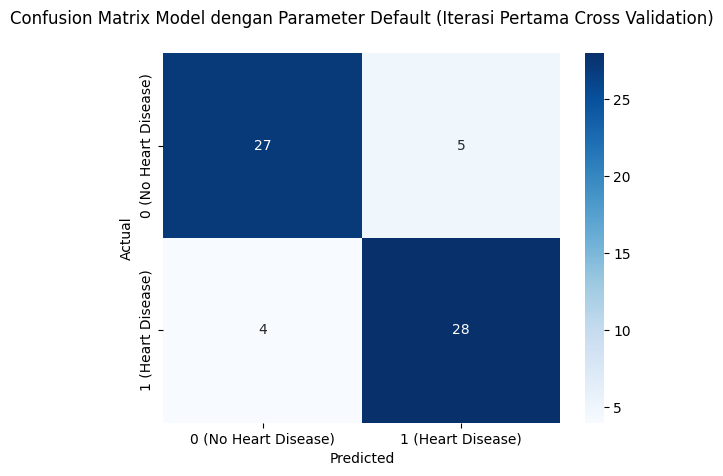

In [ ]:
# Import library yang dibutuhkan
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat matriks kebingungan
cm = confusion_matrix(y_valid_first_split, y_pred_first_split)

# Menampilkan matriks kebingungan dalam bentuk heatmap
labels = ['0 (No Heart Disease)', '1 (Heart Disease)']
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Model dengan Parameter Default (Iterasi Pertama Cross Validation)\n")
plt.show()

### **8.2.2 Metrik Evaluasi Model dengan Parameter Default pada Iterasi Pertama Cross Validation**

In [ ]:
# Import library evaluasi metrik
from sklearn import metrics

# Menghitung dan mencetak laporan klasifikasi
classification_report = metrics.classification_report(y_valid_first_split, y_pred_first_split, digits=5)

# Tampilkan hasilnya
print(classification_report)

              precision    recall  f1-score   support

           0    0.87097   0.84375   0.85714        32
           1    0.84848   0.87500   0.86154        32

    accuracy                        0.85938        64
   macro avg    0.85973   0.85938   0.85934        64
weighted avg    0.85973   0.85938   0.85934        64



Recall mengukur sejauh mana model dapat mengidentifikasi dengan benar semua sampel positif yang ada. Dalam kasus ini, recall untuk **kelas 0 (No Heart Disease)** adalah **0.84375** yang berarti model dapat memprediksi dengan benar **27 dari 32** pasien yang tidak memiliki penyakit jantung (**27/32 = 0.84375**). Sedangkan, recall untuk **kelas 1 (Heart Disease)** adalah **0.87500** yang berarti model dapat memprediksi dengan benar **28 dari 32** pasien yang memiliki penyakit jantung (**28/32 = 0.87500**) --> Hasil ini **sesuai dengan hasil cross validation untuk skor recall pertama**.

In [ ]:
metrics.recall_score(y_valid_first_split, y_pred_first_split)

0.875

Dalam membandingkan model, recall yang digunakan adalah **recall untuk sampel positif** (recall untuk kelas 1). **Recall yang lebih tinggi** menunjukkan bahwa model memiliki **kemampuan yang lebih baik** dalam **memprediksi pasien yang memiliki penyakit jantung (Heart Disease) dengan benar (True Positive)** dan memiliki tingkat **False Negative** (kesalahan model dengan memprediksi pasien tidak terkena penyakit jantung padahal terkena penyakit jantung) yang **lebih rendah**.
<br><br>
\begin{equation}
Recall =  \frac{True\ Positive}{True\ Positive + False\ Negative}
\end{equation}

## **8.3 Learning Curve Model dengan Parameter Default**

Learning curve adalah alat yang berguna dalam evaluasi kinerja model dan pemahaman tentang **bagaimana performa model berkembang seiring dengan penambahan data latih (data train)**. Learning curve menggambarkan performa model (diukur melalui metrik evaluasi yang dipilih) pada set data train dan set data validasi seiring dengan pertambahan jumlah data train yang digunakan untuk melatih model.

In [ ]:
# Import library yang dibutuhkan
import numpy as np

# Buat 10 proporsi dengan jarak yang sama untuk mengatur ukuran data train yang digunakan
train_size = np.linspace(0.1, 1.0, 10)

# Tampilkan hasil
display(train_size)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
# Import library untuk perhitungan learning curve
from sklearn.model_selection import learning_curve

# Proses menghitung nilai yang dibutuhkan untuk membentuk learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator = gbc,
    X = X_resampled,
    y = y_resampled,
    cv = stratified_kfold, # Menggunakan stratified 5-fold cross-validation
    train_sizes = train_size,
    scoring = 'recall' # Menggunakan recall sebagai metrik evaluasi
)

In [ ]:
# Menyimpan hasil perhitungan learning curve dalam dictionary
data_dict = {}
for i in range(train_scores.shape[1]):
  data_dict[('split-' + str(i+1), 'train_score')] = train_scores[:, i]
  data_dict[('split-' + str(i+1), 'test_score')] = test_scores[:, i]

# Membuat dataframe hasil perhitungan learning curve
result_learningcurve = pd.DataFrame(data_dict)

# Mengubah indeks dataframe menjadi train size yang digunakan
train_size_idx = ['train_size = ' + str(i) for i in train_sizes]
result_learningcurve = result_learningcurve.set_index(pd.Index(train_size_idx))

# Menambahkan kolom train_size, avg_train_score, dan avg_test_score
result_learningcurve['train_size'] = train_sizes
result_learningcurve['avg_train_score'] = train_scores.mean(axis = 1)
result_learningcurve['avg_test_score'] = test_scores.mean(axis = 1)

# Tampilkan hasil
result_learningcurve

split-1                split-2                split-3  \
                 train_score test_score train_score test_score train_score   
train_size = 25          1.0    0.78125    1.000000    0.78125    1.000000   
train_size = 51          1.0    0.87500    1.000000    0.68750    1.000000   
train_size = 76          1.0    0.78125    1.000000    0.81250    1.000000   
train_size = 102         1.0    0.78125    1.000000    0.78125    1.000000   
train_size = 128         1.0    0.78125    1.000000    0.84375    1.000000   
train_size = 153         1.0    0.78125    1.000000    0.78125    1.000000   
train_size = 179         1.0    0.78125    1.000000    0.81250    1.000000   
train_size = 204         1.0    0.75000    1.000000    0.84375    1.000000   
train_size = 230         1.0    0.71875    0.990196    0.84375    0.990196   
train_size = 256         1.0    0.87500    1.000000    0.84375    1.000000   

                                split-4                split-5             \
                 test_score train_score test_score train_score test_score   
train_size = 25     0.84375    1.000000    0.84375         1.0    0.62500   
train_size = 51     0.71875    1.000000    0.59375         1.0    0.62500   
train_size = 76     0.75000    1.000000    0.68750         1.0    0.65625   
train_size = 102    0.81250    1.000000    0.78125         1.0    0.68750   
train_size = 128    0.84375    1.000000    0.78125         1.0    0.71875   
train_size = 153    0.71875    1.000000    0.78125         1.0    0.68750   
train_size = 179    0.71875    1.000000    0.75000         1.0    0.78125   
train_size = 204    0.75000    1.000000    0.78125         1.0    0.81250   
train_size = 230    0.81250    1.000000    0.75000         1.0    0.84375   
train_size = 256    0.93750    0.992188    0.87500         1.0    0.87500   

                 train_size avg_train_score avg_test_score  
                                                            
train_size = 25          25        1.000000        0.77500  
train_size = 51          51        1.000000        0.70000  
train_size = 76          76        1.000000        0.73750  
train_size = 102        102        1.000000        0.76875  
train_size = 128        128        1.000000        0.79375  
train_size = 153        153        1.000000        0.75000  
train_size = 179        179        1.000000        0.76875  
train_size = 204        204        1.000000        0.78750  
train_size = 230        230        0.996078        0.79375  
train_size = 256        256        0.998437        0.88125

Proses membuat learning curve **melibatkan cross-validation** yang digunakan sebelumnya, yaitu stratified 5-fold cross-validation. **Dalam tiap split** atau iterasi cross-validation, **data train awal** yang terdiri dari 320 baris (`X_resampled`, `y_resampled`) dibagi menjadi **data train yang terdiri dari 4 lipatan (256 baris)**, dan **data validasi yang terdiri dari 1 lipatan (64 baris)**. Selanjutnya, data train hasil cross-validation tersebut (256 baris) hanya digunakan sebagian atau seluruhnya untuk melatih model sesuai proporsi pada `train_size`. Berikut penjelasan proses yang terjadi **dalam tiap split** :

* Pada **percobaan pertama**, dari **data train hasil cross-validation** (256 baris) diambil **25 baris pertama (10% dari 256 baris)** untuk digunakan sebagai data pelatihan. Setelah dilatih, model dievaluasi pada data pelatihan yang sama (**25 baris**) untuk mendapatkan **train score**. Model tersebut juga dievaluasi menggunakan **64 baris data validasi** hasil cross validation untuk mendapatkan **test score**. Recall score digunakan sebagai metrik untuk menghitung train dan test score.

* Pada **percobaan kedua**, dari **data train hasil cross-validation** (256 baris) diambil **51 baris pertama (20% dari 256 baris)** untuk digunakan sebagai data pelatihan. Setelah dilatih, model dievaluasi pada data pelatihan yang sama (**51 baris**) untuk mendapatkan **train score**. Model tersebut juga dievaluasi menggunakan **64 baris data validasi** hasil cross validation untuk mendapatkan **test score**. Recall score digunakan sebagai metrik untuk menghitung train dan test score.

* dst,

* Hingga pada **percobaan kesepuluh**, dari **data train hasil cross-validation** (256 baris) diambil **256 baris (100% dari 256 baris)** untuk digunakan sebagai data pelatihan. Setelah dilatih, model dievaluasi pada data pelatihan yang sama (**256 baris**) untuk mendapatkan **train score**. Model tersebut juga dievaluasi menggunakan **64 baris data validasi** hasil cross validation untuk mendapatkan **test score**. Recall score digunakan sebagai metrik untuk menghitung train dan test score.

Perhatikan bahwa, ketika **ukuran data train** yang digunakan untuk melatih model **maksimal** (256 baris) maka **diperoleh hasil yang sama persis dengan hasil cross-validation pada bagian 8.2** (hanya saja di sini nilai train score juga dimunculkan).

In [ ]:
# Import library visualisasi
import plotly.express as px

# Membuat line plot dengan Plotly Express
fig = px.line(
    result_learningcurve,
    x = 'train_size',
    y = ['avg_train_score', 'avg_test_score']
)

# Update layout
fig.update_layout(
    height = 500,
    width = 900,
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    yaxis = dict(
        title = 'Average Recall',
        showline = True,
        linewidth = 1,
        color = '#544018',
        linecolor = '#544018'
    ),
    xaxis = dict(
        title = 'Train Size',
        showline = True,
        linewidth = 1,
        color = '#544018',
        linecolor = '#544018'
    ),
    title = dict(
        text = "<b>Learning Curve pada Model GBC dengan Parameter <span style='color:#B33030'>Default</span></b>",
        font = dict(
            size = 20
        ),
        x = 0.07,
        y = 0.98
    )
)

# Tampilkan grafik
fig.show()

Learning curve di atas menunjukkan adanya **jarak yang signifikan** antara **skor latihan** dan **skor pengujian**. Skor latihan (rata-rata skor recall pada data train) cenderung bernilai tinggi konsisten di sekitar 1, menunjukkan bahwa model telah belajar dengan baik dari data latih. Namun, skor pengujian (rata-rata skor recall pada data validasi) tidak sebaik skor latihan, dimulai sekitar 0.75 dan meningkat tidak konsisten seiring bertambahnya ukuran data latih sehingga menunjukkan bahwa model kurang mampu menggeneralisasi pola dalam data ke data yang belum dilihat sebelumnya. Ini adalah **indikasi overfitting**.

Overfitting terjadi ketika model belajar terlalu baik dari data latihan sampai-sampai ia menangkap noise dan outlier, bukan pola umum yang ada. Akibatnya, model tersebut memiliki performa yang buruk saat diuji dengan data yang belum pernah dilihat sebelumnya.

## **8.4 Hyperparameter Tuning**

Silakan lihat list parameter di dokumentasi [sklearn.ensemble.GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier).

Dilakukan hyperparameter tuning pada parameter berikut :

* `n_estimators`: Parameter ini mengontrol **jumlah pohon keputusan** yang akan digunakan dalam model. Semakin banyak pohon yang digunakan, semakin kompleks modelnya. Tuning parameter ini dapat mempengaruhi keseimbangan antara underfitting dan overfitting. Jika nilai `n_estimators` **terlalu kecil**, model dapat cenderung **underfitting**, sedangkan jika **terlalu besar**, model dapat cenderung **overfitting**.

* `learning_rate`: Parameter ini mengontrol **kontribusi dari setiap pohon** dalam model. Secara umum, semakin kecil nilai `learning_rate`, semakin banyak pohon yang diperlukan untuk mencapai performa yang baik. Namun, nilai learning_rate yang **terlalu kecil** juga dapat menyebabkan model menjadi **lambat untuk konvergensi** atau terjebak dalam lokal minimum. Sebaliknya, nilai yang **terlalu besar** dapat menyebabkan model menjadi tidak stabil dan **overfitting**.

* `max_depth`: Parameter ini mengontrol **kedalaman maksimum dari setiap pohon** dalam model. Kedalaman yang **lebih besar** memungkinkan model untuk mempelajari pola yang **lebih kompleks** dari data latih, tetapi juga meningkatkan **risiko overfitting**. Tuning parameter `max_depth` dapat membantu mengontrol kompleksitas model dan mencegah overfitting.

* `min_samples_split`: Parameter ini menentukan **jumlah minimum sampel** yang diperlukan untuk **membagi node dalam pohon**. **Memperbesar nilai** `min_samples_split` dapat membantu **mencegah overfitting** dengan memaksa pohon untuk membagi node hanya ketika memiliki cukup sampel. Namun, nilai yang **terlalu besar** dapat menyebabkan model menjadi terlalu umum (**underfitting**).

* `max_features`: Parameter ini mengontrol **jumlah fitur yang dipertimbangkan** saat mencari split terbaik dalam setiap pohon. **Memperkecil** jumlah fitur yang dipertimbangkan dapat membantu mengurangi kompleksitas model dan **mencegah overfitting**, tetapi juga dapat mengorbankan informasi yang berharga dari fitur-fitur yang kurang dipertimbangkan.

* `subsample`: Parameter ini mengontrol **proporsi dari dataset yang digunakan untuk melatih setiap pohon**. **Mengurangi nilai subsample** dapat membantu **mengurangi varian dan overfitting**, tetapi juga dapat mengorbankan informasi dari data latih yang kurang dipertimbangkan.

In [ ]:
# Import library untuk hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Definisikan hyperparameters untuk di tuning (sertakan parameter default)
hyperparameters = dict(
    n_estimators = [100, 180, 200],
    learning_rate = [0.2, 0.1, 0.08],
    max_depth = [3, 5, 7],
    min_samples_split = [2, 5, 10],
    max_features = [None, 'sqrt', 'log2'],
    subsample = [1.0, 0.6, 0.4]
)

# Buat objek GridSearchCV
grid_search = GridSearchCV(
    gbc,
    hyperparameters,
    cv = stratified_kfold, # Menggunakan stratified 5-fold cross-validation
    scoring = 'recall' # Menggunakan recall sebagai metrik evaluasi
)

# Jalankan proses hyperparameter tuning
grid_search.fit(X_resampled, y_resampled)

# Tampilkan hyperparameter terbaik and score terbaik
print("Best Hyperparameter: ", grid_search.best_params_)
print("Best Score: {:.5f}".format(grid_search.best_score_))

Best Hyperparameter:  {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 180, 'subsample': 0.4}
Best Score: 0.91875


## **8.5 Membuat Model dengan Parameter Hasil Tuning**

In [ ]:
# Membuat objek klasifikasi GBC (dengan parameter hasil tuning)
gbc_baru = grid_search.best_estimator_

# Tampilkan hasil
gbc_baru

GradientBoostingClassifier(max_features='sqrt', n_estimators=180,
                           random_state=42, subsample=0.4)

## **8.6 Cross Validation Model dengan Parameter Hasil Tuning**


In [ ]:
# Import library untuk cross validation
from sklearn.model_selection import StratifiedKFold, cross_validate

# Membuat objek StratifiedKFold dengan k=5
stratified_kfold = StratifiedKFold(n_splits = 5)

# Melakukan cross-validation menggunakan stratified 5-fold cross-validation
gbc_baru_cv = cross_validate(
    estimator = gbc_baru,
    X = X_resampled,
    y = y_resampled,
    cv = stratified_kfold,
    scoring = 'recall', # Menggunakan recall sebagai metrik evaluasi
    return_indices = True # Mengembalikan indeks hasil split data
)

# Simpan indeks data train dan validasi selama iterasi cross-validation
train_index_baru = gbc_baru_cv['indices']['train']
valid_index_baru = gbc_baru_cv['indices']['test']

# Menampilkan hasil cross-validation
print(f"Hasil Cross-Validation Model dengan Parameter Hasil Tuning : {gbc_baru_cv['test_score']}")
print(f"Rata-rata Skor Recall                                      : {gbc_baru_cv['test_score'].mean():.5f}")
print(f"Simpangan Baku Skor Recall                                 : {gbc_baru_cv['test_score'].std():.5f}")

Hasil Cross-Validation Model dengan Parameter Hasil Tuning : [0.9375  0.875   0.96875 0.875   0.9375 ]
Rata-rata Skor Recall                                      : 0.91875
Simpangan Baku Skor Recall                                 : 0.03750


Perhatikan bahwa **rata-rata skor recall hasil cross-validation** dari model dengan parameter hasil tuning **sama dengan skor terbaik dari hasil tuning**. Ini terjadi karena proses tuning juga melibatkan cross-validation (stratified 5-fold cross-validation) dan menggunakan rata-rata skor recall untuk memilih model terbaik dari semua model yang mungkin (model dengan semua kombinasi hyperparameter yang dituning).

> Dari hasil di atas, dapat diketahui bahwa **model dengan parameter hasil tuning** memiliki **rata-rata skor recall** sebesar **0.91875** (lebih baik dari model dengan parameter default). Interpretasi nilai ini adalah **model dengan parameter hasil tuning** dapat **memprediksi dengan benar secara rata-rata 91.875% (atau sekitar 92 dari 100) pasien yang memiliki penyakit jantung**.

## **8.7 Learning Curve Model dengan Parameter Hasil Tuning**

In [ ]:
# Import library yang dibutuhkan
import numpy as np

# Buat 10 proporsi dengan jarak yang sama untuk mengatur ukuran data train yang digunakan
train_size = np.linspace(0.1, 1.0, 10)

# Tampilkan hasil
display(train_size)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
# Import library untuk perhitungan learning curve
from sklearn.model_selection import learning_curve

# Proses menghitung nilai yang dibutuhkan untuk membentuk learning curve
train_sizes, train_scores_baru, test_scores_baru = learning_curve(
    estimator = gbc_baru,
    X = X_resampled,
    y = y_resampled,
    cv = stratified_kfold, # Menggunakan stratified 5-fold cross-validation
    train_sizes = train_size,
    scoring = 'recall' # Menggunakan recall sebagai metrik evaluasi
)

In [ ]:
# Menyimpan hasil perhitungan learning curve dalam dictionary
data_dict_baru = {}
for i in range(train_scores_baru.shape[1]):
  data_dict_baru[('split-' + str(i+1), 'train_score_baru')] = train_scores_baru[:, i]
  data_dict_baru[('split-' + str(i+1), 'test_score_baru')] = test_scores_baru[:, i]

# Membuat dataframe hasil perhitungan learning curve
result_learningcurve_baru = pd.DataFrame(data_dict_baru)

# Mengubah indeks dataframe menjadi train size yang digunakan
train_size_idx = ['train_size = ' + str(i) for i in train_sizes]
result_learningcurve_baru = result_learningcurve_baru.set_index(pd.Index(train_size_idx))

# Menambahkan kolom train_size, avg_train_score, dan avg_test_score
result_learningcurve_baru['train_size'] = train_sizes
result_learningcurve_baru['avg_train_score_baru'] = train_scores_baru.mean(axis = 1)
result_learningcurve_baru['avg_test_score_baru'] = test_scores_baru.mean(axis = 1)

# Tampilkan hasil
result_learningcurve_baru

split-1                          split-2  \
                 train_score_baru test_score_baru train_score_baru   
train_size = 25               1.0         0.87500              1.0   
train_size = 51               1.0         0.78125              1.0   
train_size = 76               1.0         0.78125              1.0   
train_size = 102              1.0         0.78125              1.0   
train_size = 128              1.0         0.78125              1.0   
train_size = 153              1.0         0.78125              1.0   
train_size = 179              1.0         0.78125              1.0   
train_size = 204              1.0         0.71875              1.0   
train_size = 230              1.0         0.75000              1.0   
train_size = 256              1.0         0.93750              1.0   

                                          split-3                  \
                 test_score_baru train_score_baru test_score_baru   
train_size = 25          0.81250              1.0         0.93750   
train_size = 51          0.78125              1.0         0.71875   
train_size = 76          0.87500              1.0         0.78125   
train_size = 102         0.84375              1.0         0.87500   
train_size = 128         0.84375              1.0         0.90625   
train_size = 153         0.84375              1.0         0.84375   
train_size = 179         0.81250              1.0         0.78125   
train_size = 204         0.81250              1.0         0.81250   
train_size = 230         0.87500              1.0         0.84375   
train_size = 256         0.87500              1.0         0.96875   

                          split-4                          split-5  \
                 train_score_baru test_score_baru train_score_baru   
train_size = 25               1.0         0.75000              1.0   
train_size = 51               1.0         0.68750              1.0   
train_size = 76               1.0         0.71875              1.0   
train_size = 102              1.0         0.81250              1.0   
train_size = 128              1.0         0.84375              1.0   
train_size = 153              1.0         0.75000              1.0   
train_size = 179              1.0         0.84375              1.0   
train_size = 204              1.0         0.81250              1.0   
train_size = 230              1.0         0.81250              1.0   
train_size = 256              1.0         0.87500              1.0   

                                 train_size avg_train_score_baru  \
                 test_score_baru                                   
train_size = 25          0.71875         25                  1.0   
train_size = 51          0.65625         51                  1.0   
train_size = 76          0.62500         76                  1.0   
train_size = 102         0.71875        102                  1.0   
train_size = 128         0.75000        128                  1.0   
train_size = 153         0.71875        153                  1.0   
train_size = 179         0.81250        179                  1.0   
train_size = 204         0.81250        204                  1.0   
train_size = 230         0.84375        230                  1.0   
train_size = 256         0.93750        256                  1.0   

                 avg_test_score_baru  
                                      
train_size = 25              0.81875  
train_size = 51              0.72500  
train_size = 76              0.75625  
train_size = 102             0.80625  
train_size = 128             0.82500  
train_size = 153             0.78750  
train_size = 179             0.80625  
train_size = 204             0.79375  
train_size = 230             0.82500  
train_size = 256             0.91875

In [ ]:
# Import library visualisasi
import plotly.express as px

# Membuat line plot dengan Plotly Express
fig = px.line(
    result_learningcurve_baru,
    x = 'train_size',
    y = ['avg_train_score_baru', 'avg_test_score_baru']
)

# Update layout
fig.update_layout(
    height = 500,
    width = 900,
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    yaxis = dict(
        title = 'Average Recall',
        showline = True,
        linewidth = 1,
        color = '#544018',
        linecolor = '#544018'
    ),
    xaxis = dict(
        title = 'Train Size',
        showline = True,
        linewidth = 1,
        color = '#544018',
        linecolor = '#544018'
    ),
    title = dict(
        text = "<b>Learning Curve pada Model GBC dengan Parameter <span style='color:#B33030'>Hasil Tuning</span></b>",
        font = dict(
            size = 20
        ),
        x = 0.07,
        y = 0.98
    )
)

# Tampilkan grafik
fig.show()

Dari learning curve di atas, dapat dilihat **skor latihan** (rata-rata skor recall pada data train) **konsisten bernilai 1**, menunjukkan bahwa model telah belajar dengan baik dari data latih. Untuk **skor pengujian** (rata-rata skor recall pada data validasi), dimulai di sekitar 0.8 dan fluktuatif tetapi menunjukkan **tren naik seiring dengan penambahan data latih**. Ini menunjukkan bahwa model mampu menggeneralisasi dengan baik ke data yang tidak terlihat dan skor pengujian meningkat dengan lebih banyak data latih. Selain itu, **jarak antara skor pelatihan dan skor pengujian mengecil**, yang mengindikasikan bahwa model lebih general dan memiliki **good fit** dibandingkan dengan parameter default. Jadi, model dengan parameter hasil tuning ini tampaknya lebih baik dibandingkan dengan model dengan parameter default sebelumnya.

## **8.8 Feature Importance Pada Model dengan Parameter Hasil Tuning**


In [ ]:
# Periksa seberapa penting atau seberapa berpengaruh fitur dalam model
# Buat dataframe feature importance
feature_importance_df = pd.DataFrame({
    'Feature': gbc_baru.feature_names_in_,
    'Importance': gbc_baru.feature_importances_
})

# Urutkan fitur berdasarkan nilai importance
feature_importance_df = feature_importance_df.sort_values(
    by = 'Importance',
    ignore_index = True,
    ascending = False
)

# Tampilkan hasilnya
display(feature_importance_df)

,Feature,Importance
0,trestbps,0.122157
1,age,0.114666
2,ca,0.113159
3,chol,0.108993
4,oldpeak,0.101952
5,cp,0.101731
6,thalach,0.095505
7,thal,0.084570
8,slope,0.052668
9,sex_1,0.039646


In [ ]:
# Menghitung total nilai importance dari semua fitur
print(f"Total nilai importance dari semua fitur = {feature_importance_df['Importance'].sum():.2f}")

Total nilai importance dari semua fitur = 1.00


In [ ]:
# Plot features importance
# Import library untuk visualisasi
import plotly.express as px

# Pembulatan nilai importance
feature_importance_df['Importance'] = feature_importance_df['Importance'].round(3)

# Urutkan fitur berdasarkan nilai importance
feature_importance_df = feature_importance_df.sort_values(
    by = 'Importance',
    ignore_index = True,
    ascending = True
)

# Buat bar horizontal
fig = px.bar(
    feature_importance_df,
    x = 'Importance',
    y = 'Feature',
    text = 'Importance',
    orientation = 'h',
    color_discrete_sequence = ['#BA55D3']
)

# Update warna anotasi menjadi putih
fig.update_traces(
    textfont_color = 'white'
)

# Proses update layout
fig.update_layout(
    width = 1000,
    height = 600,
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    showlegend = False,
    title = dict(
        text = '<b>Feature Importance</b><br><sup>Gradient Boosting Classifier dengan Parameter Hasil Tuning</sup>',
        font = dict(
            size = 20
        ),
        x = 0.03
    ),
    xaxis = dict(
        title = ''
    ),
    yaxis = dict(
        title = ''
    ),
    margin = dict(
        t = 100,
        l = 100,
        b = 100,
        r = 100
    )
)

# Tampilkan grafik
fig.show()

Importance dari suatu fitur menunjukkan  **seberapa penting fitur tersebut dalam membuat prediksi dengan model**. Mengingat bahwa total nilai importance dari semua fitur adalah 1 (100%) maka nilai importance suatu fitur juga dapat diartikan sebagai **kontribusi fitur tersebut dalam membuat prediksi dengan model**. Semakin besar nilai importance-nya, semakin signifikan kontribusi fitur tersebut dalam model.

Dari grafik di atas, dapat dilihat bahwa fitur **`trestbps` (tekanan darah istirahat) memberikan kontribusi paling besar** dalam membuat prediksi status penyakit jantung dengan model, yakni sebesar 0.122 atau 12.2%. Sementara itu, **kontribusi paling kecil** berasal dari fitur **`restecg` (jenis elektrokardiografi istirahat)**, yaitu hanya sebesar 0.012 atau 1.2%. Selain itu, fitur **`fbs_1` (status apakah kadar gula darah puasa > 120 mg/dl)** merupakan **fitur dengan kontribusi terkecil kedua**, yaitu sebesar 0.017 atau 1.7%.

Berdasarkan hasil EDA sebelumnya (hasil uji parametrik dan non-parametrik), ditemukan bahwa fitur `chol` (kadar serum kolesterol) tidak berpengaruh signifikan terhadap risiko penyakit jantung dan fitur `fbs_1` (status apakah kadar gula darah puasa > 120 mg/dl) tidak memiliki hubungan signifikan dengan status penyakit jantung. Kedua temuan ini diuji pada tingkat signifikansi 5%.

Perlu ditekankan bahwa hasil-hasil tersebut tidak langsung mencerminkan feature importance dalam model. Pengujian dilakukan untuk mengevaluasi **hubungan langsung antara dua variabel**, **bukan** untuk menilai pentingnya variabel dalam memprediksi variabel target dalam model **secara bersama-sama**.